# USING VARIOUS MACHINE LEARNING METHODS FOR MODELING DATA

_BEGIN WITH SOME OF THE BASICS NEEDED FOR ANY TYPE OF ANALYSIS_

In [1]:
# SUPPORT FOR BOTH PYTHON 2 AND PYTHON 3
from __future__ import division, print_function, unicode_literals

# IMPORT REQUIRED LIBRARIES
from IPython import display
import math
import matplotlib # NOTE: This must be called before importing pyplot
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import gridspec
%matplotlib inline
import numpy as np
import os
import pandas as pd
import sklearn 
import sklearn.linear_model
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
#import tensorflow as tf
#from tensorflow.python.data import Dataset

# SET THE RANDOM SEED VALUE: 42
np.random.seed(42)

# SET UP SOME OF THE PLOT CHARACTERISTICS
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 18

# SET UP LOGGING AND DISPLAY OPTIONS
#tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'tf' is not defined

## LOAD THE DATA AND SEPARATE IT INTO TWO GROUPS: TRAINING AND TESTING DATA

In [7]:
# LOAD THE DATA
dftr = pd.read_csv('E:/CoderGirls/DATA-ANALYSIS-SUMMER-2018/TITANIC/train.csv')
dftst = pd.read_csv('E:/CoderGirls/DATA-ANALYSIS-SUMMER-2018/TITANIC/test.csv')
df = pd.read_csv('E:/CoderGirls/DATA-ANALYSIS-SUMMER-2018/TITANIC/ALL-TITANIC-PASSENGER-DATA.csv')

# BREAK THE DATA INTO TWO GROUPS: TRAINING (75%) AND TESTING (25%); SET THE RANDOM STATE (42)
#[dftr,dftst] = train_test_split(df, test_size=0.25, random_state=42)

# EXAMINE THE DATA

In [4]:
# LOOK AT THE FIRST 5 ROWS OF DATA
dftr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# LOOK AT THE FIRST 5 ROWS OF TRAINING DATA
dftr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# LOOK AT THE FIRST 5 ROWS OF TESTING DATA
dftst.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


## _CREATE A SYNTHETIC FEATURE_

In [40]:
# CREATE A NEW FEATURE COLUMN: Other
df['Status'] = np.nan # Populate it with nothing
df['Status'][df.Name.str.contains('Mr.')] = 'Mr' # Pull in "Mr"
df['Status'][df.Name.str.contains('Mrs.')] = 'Mrs' # Pull in "Mrs"
df['Status'][df.Name.str.contains('Master')] = 'Master' # Pull in "Master"
df['Status'][df.Name.str.contains('Miss')] = 'Miss' # Pull in "Miss"
df['Status'][df.Name.str.contains('Dr.')] = 'Dr' # Pull in "Dr"
df['Status'][df.Status.isnull()] = 'Other' # Designate any other values with "Other"
# df.SibSp.isnull().any()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\l

In [8]:
# SHOW THE FIRST 100 ROWS OF DATA
df.head(100)
# NOTICE THE NEW COLUMN: Status

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


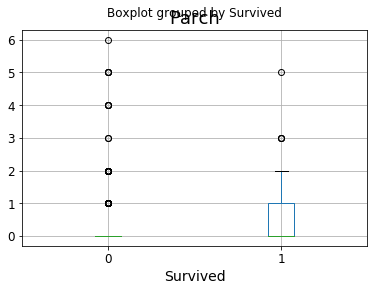

In [7]:
# SHOW PLOTS INLINE
%matplotlib inline
# SHOW A BOXPLOT OF PARENT/CHILD VS SURVIVAL
df.boxplot(column='Parch',by = 'Survived')

### Pre-processing:

Notice that some of the SibSp AND Parch are both zero. I take that to mean that the passenger was travelling alone. 

In [41]:
# DROP ALL ROWS WITH NO VALUE FOR AGE
df = df[~df.Age.isnull()]
# CREATE A FEATURE COLUMN (family_size) AND SET THE VALUE OF EQUAL TO THE NUMBER OF SIBLINGS PLUS THE PARENT + CHILD
df['family_size'] = df['SibSp'] + df['Parch']+1 
print(df['family_size'].head())

0    2
1    2
2    1
3    2
4    1
Name: family_size, dtype: int64


That's interesting! It looks like all of the first-listed (first 100) passengers on the manifest were travelling in groups of two. 

In [22]:
print(df['family_size'][31:36])

31    2
32    2
33    2
34    2
35    2
Name: family_size, dtype: int8


In [23]:
print(df['family_size'][61:69])

61    2
62    2
63    2
64    2
65    2
66    2
67    2
68    2
Name: family_size, dtype: int8


In [27]:
print(df['family_size'][99:102])

99     2
100    2
101    2
Name: family_size, dtype: int8


In [12]:
type(df['Sex'])

pandas.core.series.Series

I find this interesting because I am wondering if the 1st-Class passengers were checked in first and if they predominantly travelled as couples. 

I am wondering if this also had a bearing on their survival rate and on the survival rate for 2-person families.

I am wondering if larger families typically travelled as 3rd-Class passengers (because money was an issue) and if that also had a bearing on the survival rate of larger families....

In [26]:
print(df['family_size'].tail(5))

703    4
704    4
705    4
706    4
707    4
Name: family_size, dtype: int8


Hm. It looks as though the later passengers (last 100) on the manifest were travelling in larger groups (3 to 6).

I want to explore the relationship between fare, family_size, and survival. Also, check on how many of the 1st-Class passengers appear later in the manifest.

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pred,survival_ratio_y,survival_ratio_x,survival_ratio_y,survival_ratio_x,survival_ratio_y,survival_ratio_x,survival_ratio_y,survival_ratio,family_size


It looks as though passengers were NOT checked-in by Class of ticket, nor by size of family. 

Ah, this is a good example of making sure the data is well-understood: the data just reviewed was from the original manifest and shows that passengers of different classes and family sizes were checked-in with no separation. However, the data above it was a subset of the original data (and led to more questions). 
Moral: know your data. Keep in mind what data you are looking at and what has been done to it. 

In [42]:
# COUNT HOW MANY SURVIVED BASED ON FAMILY SIZE 
survived = df.groupby('family_size')['Survived'].sum()
print("The number of families by size was: \nfam.sz  #  ", survived);

total = df.groupby('family_size')['Survived'].count()
print("The total survivals grouped by family size was: \nfam.sz survived",total)

ratio = pd.DataFrame(survived.values/total.values)
ratio.rename(columns={0:'survival_ratio'},inplace=True)
ratio['family_size'] = ratio.index
df = pd.merge(df,ratio, left_on= 'family_size',right_on='family_size')

The number of families by size was: 
fam.sz  #   family_size
1    130
2     76
3     53
4     21
5      3
6      3
7      4
8      0
Name: Survived, dtype: int64
The total survivals grouped by family size was: 
fam.sz survived family_size
1    404
2    139
3     93
4     27
5     11
6     22
7     12
8      6
Name: Survived, dtype: int64


I think this is a dead-end. I'm going back to the original analysis. 

In [15]:
# SET EACH OF THESE FEATURES TO CATEGORICAL (NOT NUMERIC) VALUES
df['Survived'] = pd.Categorical(df.Survived).codes
df['Pclass'] = pd.Categorical(df.Pclass).codes
df['Sex'] = pd.Categorical(df.Sex).codes
df['Embarked'] = pd.Categorical(df.Embarked).codes
df['SibSp'] = pd.Categorical(df.SibSp).codes
df['Parch'] = pd.Categorical(df.Parch).codes
df['Status'] = pd.Categorical(df.Status).codes
df['family_size'] = pd.Categorical(df.family_size).codes

# df['Pred'] = pd.Categorical(df.Pred).codes
# df['age_group'] = pd.cut(df.Age,bins=[0,10,20,30,40,50,60,70],labels=)

### INITIAL LOGISTIC REGRESSION MODEL

In [44]:
# IMPORT THE LOGISTIC REGRESSION MODEL FROM SKLEARN
# from sklearn.linear_model import LogisticRegression # This was done above.

# SET THE MODEL: LOGISTIC REGRESSION 
# (SET THE NUMBER OF ITERATIONS TO 100; SET THE RANDOM STATE VALUE TO 0.)
LRmodel = LogisticRegression(max_iter=100,random_state=0)

# SET THE FEATURES TO BE USED WITH THE LOGISTIC REGRESSION MODEL
feature_list = ['Pclass']

X = df[feature_list] # SET THE FEATURES TO BE USED AS PREDICTORS
Y = df['Survived'] # SET THE TARGET FEATURE 

# TRAIN THE MODEL
LRmodel.fit(X,Y)

# 
df['Pred'] = LRmodel.predict(X)
df['Pred'] = pd.Categorical(df.Pred).codes # TELL THE MODEL THE PREDICTORS WILL BE CATEGORICAL VALUES

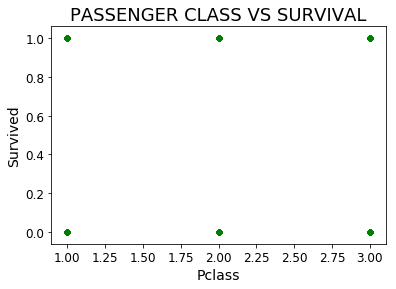

In [46]:
# DRAW A SCATTERPLOT OF THE DATA
df.plot(kind='scatter', x="Pclass", y='Survived', title='PASSENGER CLASS VS SURVIVAL', color = "green")
plt.show()

_Okay, it's silly to show a scatterplot because all of the values fall directly atop one another. 
For each class of passenger (1, 2, or 3), they either survived (value = 1) or did not (value = 0)._

In [49]:
# TO LIST ALL OF THE COLUMN NAMES 
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Status', 'family_size',
       'survival_ratio', 'Pred'],
      dtype='object')

In [50]:
# SET THE FEATURES TO BE USED WITH THE LOGISTIC REGRESSION MODEL (All features)
feature_list = ['Pclass','Sex','Fare','Embarked','Age','Status','family_size','survival_ratio']
X = df[feature_list] # SET THE FEATURES TO BE USED AS PREDICTORS
Y = df['Survived'] # SET THE TARGET FEATURE 

In [51]:
# BREAK THE DATA INTO TWO GROUPS: TRAINING (75%) AND TESTING (25%); SET THE RANDOM STATE (42)
[dftr,dftst] = train_test_split(df, test_size=0.20, random_state=42)

In [52]:
print("Shape of the training data: ", dftr.shape)
print("Shape of the test data:     ", dftst.shape)
print("Shape of the whole dataset: ", df.shape)

Shape of the training data:  (566, 16)
Shape of the test data:      (142, 16)
Shape of the whole dataset:  (708, 16)


In [53]:
# SET THE TRAINING AND TEST PREDICTORS AND TARGETS
Xtr = dftr[feature_list]
Xtst = dftst[feature_list]
Ytr = dftr['Survived']
Ytst = dftst['Survived']

## CHANGE THE FEATURES USED

In [22]:
# IMPORT THE LOGISTIC REGRESSION MODEL FROM SKLEARN
from sklearn.linear_model import LogisticRegression

# PERFORM A LOGISTIC REGRESSION (SET THE NUMBER OF ITERATIONS TO 100; SET THE RANDOM STATE VALUE TO 0.)
LRmodel = LogisticRegression(max_iter=100,random_state=0)

# SET THE FEATURES TO BE USED WITH THE LOGISTIC REGRESSION MODEL
feature_list = ['Sex','Status','Age']

X = df[feature_list] # SET THE FEATURES TO BE USED AS PREDICTORS
Y = df['Survived'] # SET THE TARGET FEATURE

# TELL THE MODEL WE ARE USING X AND Y AS PREDICTORS AND TARGET 
LRmodel.fit(X,Y)

# 
df['Pred'] = LRmodel.predict(X)
df['Pred'] = pd.Categorical(df.Pred).codes

In [ ]:
feature_list = ['Pclass','Sex','Fare','Status']
X = df[feature_list]
Y = df['Survived']

In [ ]:
[dftr,dftst] = train_test_split(df,test_size=0.25, random_state=42)

In [ ]:
print("Shape of the training data: ", dftr.shape)
print("Shape of the test data:     ", dftst.shape)
print("Shape of the whole dataset: ", df.shape)

In [ ]:
Xtr = dftr[feature_list]
Xtst = dftst[feature_list]
Ytr = dftr['Survived']
Ytst = dftst['Survived']

## Random Forest Classifier:

In [18]:
# IMPORT THE RANDOM FOREST CLASSIFIER FROM SKLEARN
from sklearn.ensemble import RandomForestClassifier

# RUN THE RANDOM FOREST CLASSIFIER ON THE DATA
RFmodel = RandomForestClassifier(n_estimators= 200,max_features=len(feature_list)) # SET THE NUMBER OF TREES (200)
# AND SET THE MAXIMUM NUMBER OF FEATURES CHECKED TO THE NUMBER SPECIFIED

In [19]:
# RUN THE RANDOM FOREST MODEL
RFmodel.fit(Xtr,Ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [20]:
# LIST THE IMPORTANCE OF EACH OF THE FEATURES 
RFmodel.feature_importances_

array([ 0.11677032,  0.31152769,  0.19358532,  0.02144848,  0.21304379,
        0.06905345,  0.04763072,  0.02694023])

From this, we see that the features in order of declining importance to the model are: Sex, Age, Fare, Pclass, Status, family_size, survival_ratio, and Embarked.

I would drop any features that have less than 5% importance: family_size, survival_ratio, and Embarked. 

In [21]:
RF_prediction = RFmodel.predict(Xtst)
metrics.accuracy_score(Ytst,RF_prediction)

0.76271186440677963

# Change the Features Used

(531, 16)
(177, 16)
(708, 16)


In [77]:
Xtr = dftr[feature_list]
Xtst = dftst[feature_list]
Ytr = dftr['Survived']
Ytst = dftst['Survived']

## Insert the Random Forest Classifiers

In [117]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators= 200,max_features=len(feature_list))
#RFmodel = RandomForestClassifier(n_estimators= 200)

In [118]:
RFmodel.fit(Xtr,Ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [119]:
RFmodel.feature_importances_

array([ 0.15451261,  0.36835241,  0.36767942,  0.10945556])

In [120]:
RF_prediction = RFmodel.predict(Xtst)
metrics.accuracy_score(Ytst,RF_prediction)

0.78531073446327682

# USING GRID SEARCH

In [122]:
from sklearn.model_selection import GridSearchCV

## Cross Validation:

In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
scores = cross_val_score(RFmodel, X, Y, cv=100,scoring='accuracy')

In [115]:
scores

array([ 0.875     ,  0.875     ,  0.875     ,  1.        ,  0.75      ,
        0.875     ,  0.75      ,  0.875     ,  0.875     ,  0.75      ,
        1.        ,  0.75      ,  0.875     ,  0.875     ,  0.875     ,
        0.875     ,  1.        ,  0.75      ,  1.        ,  0.57142857,
        0.85714286,  1.        ,  0.85714286,  0.42857143,  1.        ,
        0.85714286,  0.85714286,  0.71428571,  1.        ,  0.85714286,
        0.71428571,  0.57142857,  1.        ,  0.85714286,  0.57142857,
        0.71428571,  0.71428571,  0.71428571,  0.42857143,  0.71428571,
        0.85714286,  1.        ,  0.85714286,  0.85714286,  0.71428571,
        0.57142857,  0.71428571,  0.71428571,  0.85714286,  0.85714286,
        0.71428571,  0.85714286,  0.71428571,  0.71428571,  0.85714286,
        0.85714286,  0.85714286,  0.71428571,  0.71428571,  1.        ,
        0.85714286,  0.85714286,  0.85714286,  0.85714286,  0.85714286,
        0.71428571,  1.        ,  0.85714286,  0.71428571,  0.71

In [116]:
scores.mean()
# The accuracy score is a better predictor. Mean score has no meaning for this.

0.8169047619047618

In [ ]:
# no Pred: 0.8315
# with Pred: 0.833000
# with Pred, family_size, survival_ratio: 0.824

##  Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier()

In [87]:
DTmodel.fit(Xtr,Ytr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [88]:
DT_prediction = DTmodel.predict(Xtst)

In [89]:
metrics.accuracy_score(Ytst,DT_prediction)

0.79661016949152541

## Logistic Regression:

In [90]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(max_iter=100,random_state=0)

In [101]:
feature_list = ['Pclass','Sex','Fare','Status']

Xtr = dftr[feature_list]
Xtst = dftst[feature_list]
Ytr = dftr['Survived']
Ytst = dftst['Survived']

In [102]:
LRmodel.fit(Xtr,Ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
LR_prediction = LRmodel.predict(Xtst)

In [104]:
metrics.accuracy_score(Ytst,LR_prediction)

0.75141242937853103

## SVM:

In [95]:
from sklearn.svm import SVC

In [96]:
SVmodel = SVC()

In [105]:
feature_list = ['Pclass','Sex','Fare','Status']

Xtr = dftr[feature_list]
Xtst = dftst[feature_list]
Ytr = dftr['Survived']
Ytst = dftst['Survived']

In [106]:
SVmodel.fit(Xtr,Ytr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [107]:
SV_prediction = SVmodel.predict(Xtst)

In [108]:
metrics.accuracy_score(Ytst,SV_prediction)

0.78531073446327682